# CLUSTERING (Unsupervised ML)

## Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss,silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, k_means
from sklearn.cluster import MiniBatchKMeans



# to make this notebook's output stable across runs
np.random.seed(40)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Describing Dataset

#### A dataset that has a record of customer information and their outlook with respect to a certain event

In [2]:
events= pd.read_csv("EventsRecord.csv",low_memory=False)

In [3]:
events

,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,Total_Household_Income,How often you attend Entertaining events in a year?,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?
0,1,40-49,Female,AL9 7BN,Welwyn Hatfield,Welwyn Hatfield,51.727429,-0.183648,Married with children,"50,000 to 74,999",4 Times a Year,Up to 1 hour,3 hours,Entirely disagree,Entirely agree,Ice Bar,Somewhat agree,Somewhat Unlikely,Somewhat disagree
1,2,60-64,Male,AL7 1ZW,Welwyn Hatfield,Welwyn Hatfield,51.804482,-0.195898,Married with children,"35,000 to 49,999",3 Times a Year,Up to 1 hour,5 hours,Somewhat disagree,Entirely agree,Happy Rollercoaster,Mostly agree,Somewhat Likely,Entirely disagree
2,3,50-59,Male,AB4 5JX,Aberdeenshire,Banff and Buchan,57.692200,-2.022295,Married with children,"75,000 to 99,999",3 Times a Year,I don't spend any time at all,5 hours,Somewhat disagree,Somewhat agree,Happy Rollercoaster,Mostly agree,Mostly Unlikely,Entirely disagree
3,4,50-59,Female,B24 0DL,Birmingham,"Birmingham, Erdington",52.526595,-1.822211,Married without children,"35,000 to 49,999",1 Times a Year,Half a day,1 hour,Entirely agree,Neither agree nor disagree,Crazy rollercoaster ride,Somewhat agree,Somewhat Likely,Somewhat disagree
4,5,60-64,Male,E17 5QP,Waltham Forest,Walthamstow,51.593979,-0.040803,Married with children,"100,000 to 149,999",3 Times a Year,Up to 1 hour,6 hours plus,Mostly disagree,Neither agree nor disagree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14778,16262,40-49,Male,AB23 8JT,Aberdeen City,Gordon,57.203497,-2.096799,Married with children,"100,000 to 149,999",3 Times a Year,I don't spend any time at all,4 hours,Somewhat disagree,Entirely agree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree
14779,16263,21-25,Male,CV34 5JN,Warwick,Warwick and Leamington,52.297782,-1.588626,"Single, never married","Less than 20,000",4 Times a Year,Up to 2 hours,3 hours,Neither agree nor disagree,Entirely disagree,Wooden Bar,Mostly agree,Mostly Likely,Somewhat agree
14780,16264,40-49,Male,CM8 1FU,Braintree,Witham,51.789173,0.624822,Living with partner,"100,000 to 149,999",4 Times a Year,Up to 1 hour,3 hours,Somewhat agree,Entirely disagree,Ice Bar,Mostly agree,Somewhat Likely,Neither agree nor disagree
14781,16266,50-59,Male,DD8 3JF,Angus,Angus,56.648815,-2.895498,Married with children,"100,000 to 149,999",3 Times a Year,I don't spend any time at all,4 hours,Somewhat disagree,Entirely agree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree


In [11]:
events.dtypes

CUSTOMER                                                            int64
Age                                                                object
Gender                                                             object
Postcode                                                           object
District                                                           object
Constituency                                                       object
latitude                                                          float64
longitude                                                         float64
Current_Status                                                     object
Total_Household_Income                                             object
How often you attend Entertaining events in a year?                object
Social_Media                                                       object
How many hours are you willing to travel to attend an event?       object
Do you enjoy adrenaline-rush activitie

In [12]:
events.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14778 entries, 0 to 14782
Data columns (total 19 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   CUSTOMER                                                        14778 non-null  int64  
 1   Age                                                             14778 non-null  object 
 2   Gender                                                          14778 non-null  object 
 3   Postcode                                                        14778 non-null  object 
 4   District                                                        14778 non-null  object 
 5   Constituency                                                    14778 non-null  object 
 6   latitude                                                        14778 non-null  float64
 7   longitude                                        

In [13]:
events.isnull().sum()

CUSTOMER                                                          0
Age                                                               0
Gender                                                            0
Postcode                                                          0
District                                                          0
Constituency                                                      0
latitude                                                          0
longitude                                                         0
Current_Status                                                    0
Total_Household_Income                                            0
How often you attend Entertaining events in a year?               0
Social_Media                                                      0
How many hours are you willing to travel to attend an event?      0
Do you enjoy adrenaline-rush activities?                          0
Are food areas, coffee areas, bars & toilets imp

## Fillup Missing Data

In [14]:
events = events.dropna(subset = ['Total_Household_Income'])
events.isnull().sum()

CUSTOMER                                                          0
Age                                                               0
Gender                                                            0
Postcode                                                          0
District                                                          0
Constituency                                                      0
latitude                                                          0
longitude                                                         0
Current_Status                                                    0
Total_Household_Income                                            0
How often you attend Entertaining events in a year?               0
Social_Media                                                      0
How many hours are you willing to travel to attend an event?      0
Do you enjoy adrenaline-rush activities?                          0
Are food areas, coffee areas, bars & toilets imp

In [15]:
print(events.shape)

(14778, 19)


## Converting Categirical features to Binary

In [16]:
events.columns

Index(['CUSTOMER', 'Age', 'Gender', 'Postcode', 'District', 'Constituency',
       'latitude', 'longitude', 'Current_Status', 'Total_Household_Income',
       'How often you attend Entertaining events in a year?', 'Social_Media',
       'How many hours are you willing to travel to attend an event?',
       'Do you enjoy adrenaline-rush activities?',
       'Are food areas, coffee areas, bars & toilets important to you?',
       'What is your favourite attraction from below:',
       'Were you satisfied with the last event you attended with us?',
       'Would you recommend our events to other people?',
       'Did you find our events value for money?'],
      dtype='object')

In [17]:
features = ['Age', 'Gender', 'Current_Status',
       'How often you attend Entertaining events in a year?', 'Social_Media',
       'How many hours are you willing to travel to attend an event?',
       'Do you enjoy adrenaline-rush activities?',
       'Are food areas, coffee areas, bars & toilets important to you?',
       'What is your favourite attraction from below:',
       'Were you satisfied with the last event you attended with us?',
       'Would you recommend our events to other people?',
       'Did you find our events value for money?']

In [18]:
data = events[features]

In [19]:
new_events = pd.get_dummies(data, columns = features)
new_events.head()

,Age_17 or younger,Age_18-20,Age_21-25,Age_26-32,Age_33-39,Age_40-49,Age_50-59,Age_60-64,Age_65 or older,Gender_Female,...,Would you recommend our events to other people?_Somewhat Unlikely,Would you recommend our events to other people?_Very Likely,Would you recommend our events to other people?_Very Unlikely,Did you find our events value for money?_Entirely agree,Did you find our events value for money?_Entirely disagree,Did you find our events value for money?_Mostly agree,Did you find our events value for money?_Mostly disagree,Did you find our events value for money?_Neither agree nor disagree,Did you find our events value for money?_Somewhat agree,Did you find our events value for money?_Somewhat disagree
0,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0


In [20]:
new_events.shape

(14778, 78)

## K-means Clustering

In [112]:
# running the kmeans algorithm, with 4 clusters
X_train = new_events.values
X = X_train
kmeans = KMeans(n_clusters=4,random_state=540)
kmeans = kmeans.fit(X)
print("The clusters are: ", kmeans.labels_)
print("The Inertia is: ", kmeans.inertia_)

The clusters are:  [0 0 0 ... 0 2 0]
The Inertia is:  96115.92240466225


In [113]:
y_pred = kmeans.predict(X_train)
y_pred

array([0, 0, 0, ..., 0, 2, 0])

In [114]:
y_pred is kmeans.labels_

False

In [99]:
accuracy_score(kmeans.labels_,y_pred)

0.550345107592367

### Inertia & Elbow Method

In [76]:
# Inertia is a metric that shows how internally coherent clusters are.
# Finding the right number of k
no_of_clusters = range(2,15)
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X)
    i = kmeans.inertia_
    inertia.append(i)
    print("The inertia for :", f, "Clusters is:", u)

The inertia for : 2 Clusters is: 113828.57838092856
The inertia for : 3 Clusters is: 104222.03360127324
The inertia for : 4 Clusters is: 96115.91925373183
The inertia for : 5 Clusters is: 91847.21521307991
The inertia for : 6 Clusters is: 86396.15714976969
The inertia for : 7 Clusters is: 83787.2156323967
The inertia for : 8 Clusters is: 81661.14169400133
The inertia for : 9 Clusters is: 79768.68068015312
The inertia for : 10 Clusters is: 78686.05226887837
The inertia for : 11 Clusters is: 77556.14184178617
The inertia for : 12 Clusters is: 76747.55911963753
The inertia for : 13 Clusters is: 75983.86303293546
The inertia for : 14 Clusters is: 75107.29955742133


Text(0.5, 1.0, 'Inertia Plot per k')

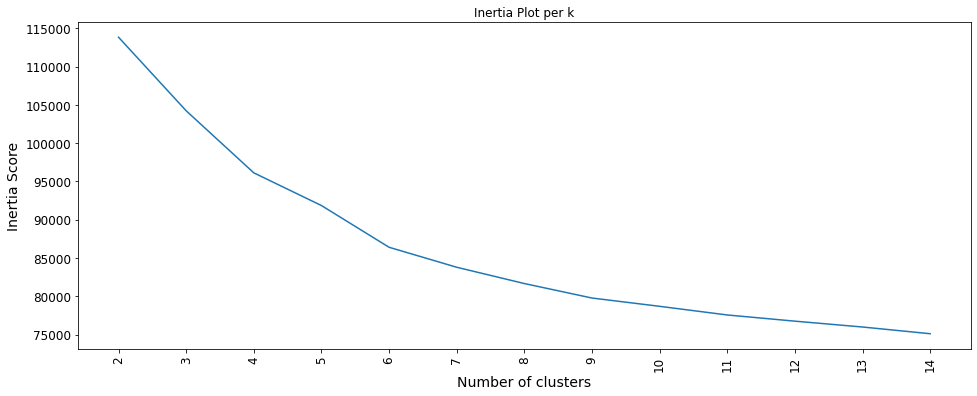

In [77]:
# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xe = np.arange(len(no_of_clusters))
ax1.plot(xe, inertia)
ax1.set_xticks(xe)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [106]:
# Running K means on 6 clusters

kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_train)


kmeans.labels_

# "predictions" for new data
predictions = kmeans.predict(X_train)

# calculating the Counts of the cluster
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,5)

# Creating a datagrame
countcls = pd.DataFrame(counts, columns = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"])

# display
countcls

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,4082,1226,4419,2837,2214


In [107]:
kmeans.labels_

array([2, 0, 0, ..., 2, 4, 0])

In [108]:
predictions

array([2, 0, 0, ..., 2, 4, 0])

In [109]:
new_events.shape

(14778, 78)

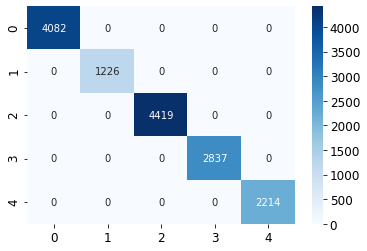

In [110]:
cm = confusion_matrix(kmeans.labels_, predictions)
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

In [111]:
accuracy_score(kmeans.labels_,predictions)

1.0

## Visualization of K-Means

Explained variance ratio (first two components): [0.17726435 0.07805254]


<Figure size 432x288 with 0 Axes>

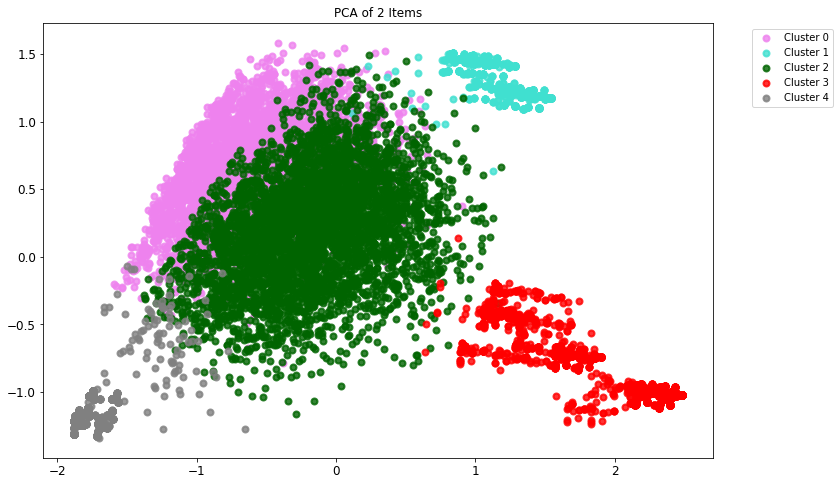

In [32]:
# Running PCA(Principal component analysis) to Visualize the data

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"]

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)


print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['violet', 'turquoise', 'darkgreen', 'red', 'grey']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.show()

## Hierarchical Clustering

In [35]:
X = new_events.values

In [36]:
#Hierarchichal Clustering, is a method of cluster analysis which seeks to build a hierarchy of clusters
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')

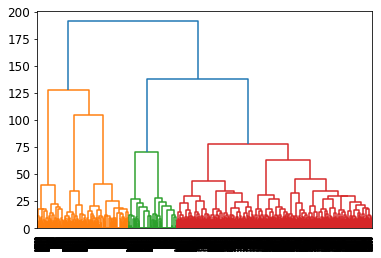

In [37]:
hc.fit(X)
dendro = sch.dendrogram(sch.linkage(X,method = "ward", metric = "euclidean"))

In [38]:
hclabel = hc.labels_
hclabel

array([1, 1, 1, ..., 1, 2, 1], dtype=int64)

In [39]:
#silhouette score is a metric used to calculate the goodness of a clustering technique(Min=-1, Max =+1)
silhouette_score(X,hclabel)

0.14499575479633375